In [8]:
import os
import json

score_lst_trustworthiness = 0
score_lst_alliance = 0
counter = 0

player_wins = [0, 0, 0, 0, 0]
trustworthiness = []
alliance_lst = []

trustworthiness_player = [[], [], [], [], []]


data_files = os.listdir('server/data')
for file_ in data_files:
    index = int(file_[5:].split(".")[0])
    if index % 2 == 0:
        with open(f"server/data/{file_}") as f:

            data = json.load(f)
            last_key = list(data.keys())[-1]
            player_won = int(data[last_key].split(" ")[1])
            player_str = "player" + str(player_won)
            score_lst_trustworthiness += data[player_str]["trustworthiness"]
            trustworthiness.append(data[player_str]["trustworthiness"])

            score_lst_alliance += data[player_str]["likelihood_of_alliance"]
            alliance_lst.append(data[player_str]["likelihood_of_alliance"])

            trustworthiness_player[player_won].append(data[player_str]["trustworthiness"])
        
            player_wins[player_won] += 1
            counter += 1


print(f"Mean trustworthiness for winners was {score_lst_trustworthiness / counter}")
print(f"Mean alliance for winners was {score_lst_alliance / counter}")
print(f"The player who won the most was {player_wins.index(max(player_wins)) + 1}")



def calc_median(lst):
    median = 0
    sorted_lst = sorted(lst)
    if(len(sorted_lst) % 2 == 0):
        index_mid1 = int((len(sorted_lst) / 2) - 1)
        index_mid2 = int(len(sorted_lst) / 2)
        median = (sorted_lst[index_mid1] + sorted_lst[index_mid2]) / 2
        return median

    index_mid = int(len(sorted_lst) / 2)
    median = sorted_lst[index_mid]
    return median
    

print(calc_median(trustworthiness))
print(calc_median(alliance_lst))

Mean trustworthiness for winners was 0.572424668103703
Mean alliance for winners was 0.4154028836121285
The player who won the most was 2
0.6902464731709277
0.415662505126537


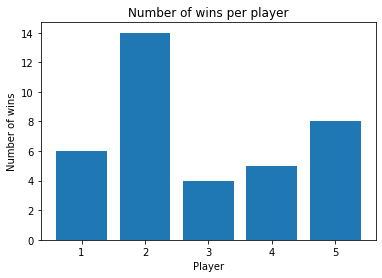

In [9]:
# mode calculation and plot
import matplotlib.pyplot as plt
plt.bar([1, 2, 3, 4, 5], player_wins)
plt.xlabel("Player")
plt.ylabel("Number of wins")
plt.title("Number of wins per player")
plt.show()

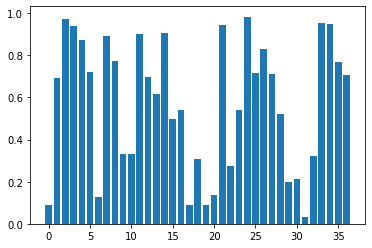

In [10]:
plt.bar(range(len(trustworthiness)), trustworthiness)
plt.show()

Text(0, 0.5, 'Trustworthiness Score')

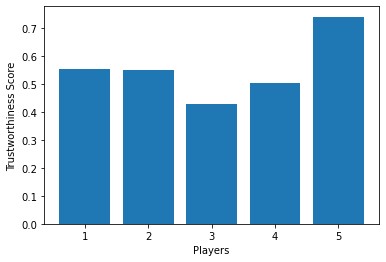

In [12]:
avg_arr = []
for arr in trustworthiness_player:
    avg_arr.append(sum(arr)/len(arr))

plt.bar([1,2,3,4,5], avg_arr)
plt.xlabel("Players")
plt.ylabel("Trustworthiness Score")

In [13]:
def p_player(player_num):
    return player_wins[player_num - 1] / sum(player_wins)

def p_trust_greater(player_num):
    counter = 0
    arr = trustworthiness_player[player_num - 1]
    for i in arr:
        if i > 0.5:
            counter += 1
    return counter / len(arr)

def p_win(player_num):
    return player_wins[player_num-1] / sum(player_wins)


def trust_given_w(player_num):
    
